In [1]:
import tensorflow as tf
import matplotlib.pylab as plt

import tensorflow_hub as hub
import numpy as np
import pandas as pd
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
U_labels = np.array(["0+", "30+", "60+"])

In [4]:
import os
file = []
for i in os.listdir("./Dataset/dataset"):
    for j in os.listdir("./Dataset/dataset/"+i):
        file.append(("./Dataset/dataset/"+i+"/"+j, i))
file

[('./Dataset/dataset/0+/16d8368695.jpg', '0+'),
 ('./Dataset/dataset/0+/d2422a84b6.jpg', '0+'),
 ('./Dataset/dataset/0+/image (1).jpeg', '0+'),
 ('./Dataset/dataset/0+/image (1).jpg', '0+'),
 ('./Dataset/dataset/0+/image (10).jpeg', '0+'),
 ('./Dataset/dataset/0+/image (10).jpg', '0+'),
 ('./Dataset/dataset/0+/image (11).jpeg', '0+'),
 ('./Dataset/dataset/0+/image (11).jpg', '0+'),
 ('./Dataset/dataset/0+/image (12).jpeg', '0+'),
 ('./Dataset/dataset/0+/image (12).jpg', '0+'),
 ('./Dataset/dataset/0+/image (13).jpg', '0+'),
 ('./Dataset/dataset/0+/image (14).jpg', '0+'),
 ('./Dataset/dataset/0+/image (15).jpg', '0+'),
 ('./Dataset/dataset/0+/image (18).jpg', '0+'),
 ('./Dataset/dataset/0+/image (19).jpg', '0+'),
 ('./Dataset/dataset/0+/image (2).jpeg', '0+'),
 ('./Dataset/dataset/0+/image (2).jpg', '0+'),
 ('./Dataset/dataset/0+/image (20).jpg', '0+'),
 ('./Dataset/dataset/0+/image (3).jpeg', '0+'),
 ('./Dataset/dataset/0+/image (3).jpg', '0+'),
 ('./Dataset/dataset/0+/image (4).jpeg',

In [5]:
print(file[0][1]==U_labels)

[ True False False]


In [6]:
boolean_labels = [U_labels == i[1] for i in file]
boolean_labels

[array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([

In [7]:
boolean_labels = np.array(boolean_labels)
boolean_labels[:, 0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [8]:
X = np.array([i[0] for i in file])
y = np.array([i[1] for i in file])
X, y

(array(['./Dataset/dataset/0+/16d8368695.jpg',
        './Dataset/dataset/0+/d2422a84b6.jpg',
        './Dataset/dataset/0+/image (1).jpeg',
        './Dataset/dataset/0+/image (1).jpg',
        './Dataset/dataset/0+/image (10).jpeg',
        './Dataset/dataset/0+/image (10).jpg',
        './Dataset/dataset/0+/image (11).jpeg',
        './Dataset/dataset/0+/image (11).jpg',
        './Dataset/dataset/0+/image (12).jpeg',
        './Dataset/dataset/0+/image (12).jpg',
        './Dataset/dataset/0+/image (13).jpg',
        './Dataset/dataset/0+/image (14).jpg',
        './Dataset/dataset/0+/image (15).jpg',
        './Dataset/dataset/0+/image (18).jpg',
        './Dataset/dataset/0+/image (19).jpg',
        './Dataset/dataset/0+/image (2).jpeg',
        './Dataset/dataset/0+/image (2).jpg',
        './Dataset/dataset/0+/image (20).jpg',
        './Dataset/dataset/0+/image (3).jpeg',
        './Dataset/dataset/0+/image (3).jpg',
        './Dataset/dataset/0+/image (4).jpeg',
        './Da

In [9]:
df = pd.DataFrame({"X":X,
                   "y":y})
df

,X,y
0,./Dataset/dataset/0+/16d8368695.jpg,0+
1,./Dataset/dataset/0+/d2422a84b6.jpg,0+
2,./Dataset/dataset/0+/image (1).jpeg,0+
3,./Dataset/dataset/0+/image (1).jpg,0+
4,./Dataset/dataset/0+/image (10).jpeg,0+
...,...,...
236,./Dataset/dataset/60+/fce688cfaf.jpg,60+
237,./Dataset/dataset/60+/febcb8b15c.jpg,60+
238,./Dataset/dataset/60+/ff0c4e1292.jpg,60+
239,./Dataset/dataset/60+/fjghf.jpg,60+


In [10]:
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
train, val = train_test_split(df,
                              test_size=0.2,
                              random_state=42)

len(train), len(val)

(192, 49)

In [11]:
train

,X,y
115,./Dataset/dataset/30+/0.93061400_1564398824_78...,30+
205,./Dataset/dataset/60+/cc14e18efc.jpg,60+
216,./Dataset/dataset/60+/d87b36b150.jpg,60+
132,./Dataset/dataset/30+/e5a6a4cc65.jpg,30+
84,./Dataset/dataset/0+/rice025a.jpg,0+
...,...,...
106,./Dataset/dataset/0+/rice036a.jpg,0+
14,./Dataset/dataset/0+/image (19).jpg,0+
92,./Dataset/dataset/0+/rice029a.jpg,0+
179,./Dataset/dataset/60+/74dccb79e0.jpg,60+


In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [13]:
IMG_SIZE = 224
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_dataframe(train,
                                                     x_col="X",
                                                     y_col='y',
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=(IMG_SIZE,IMG_SIZE),
                                                     class_mode='categorical')

Found 192 validated image filenames belonging to 3 classes.


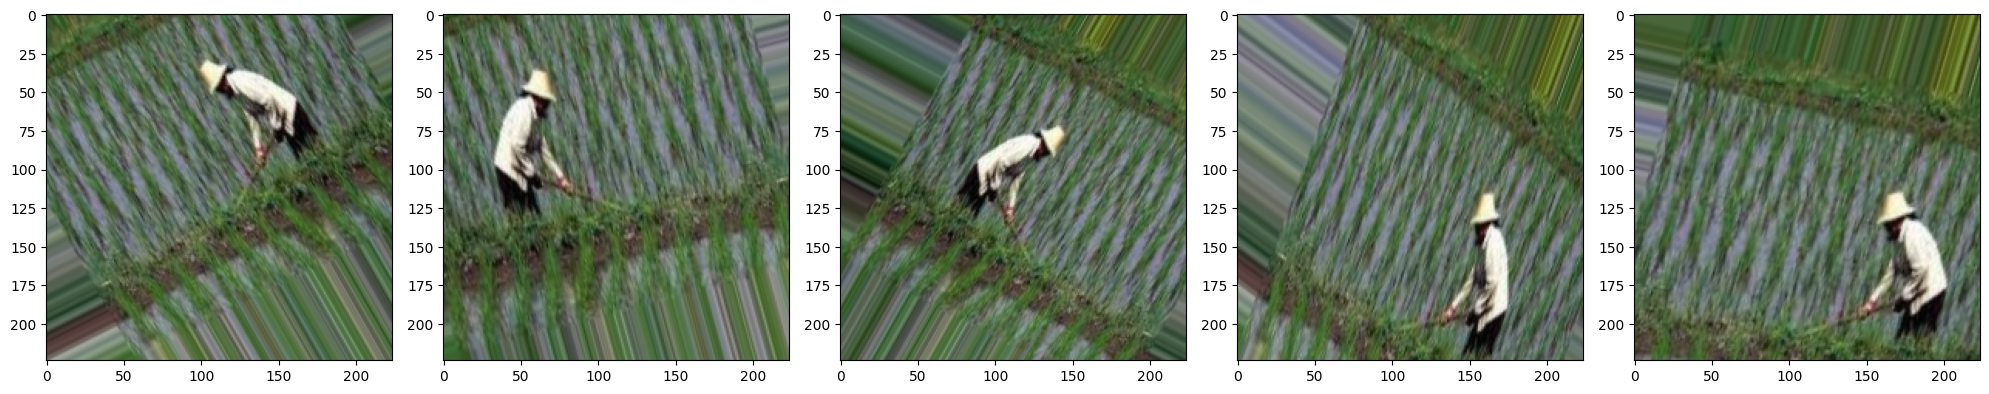

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [15]:
image_gen_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_dataframe(val,
                                                   x_col="X",
                                                   y_col='y',
                                                   batch_size=32,
                                                   target_size=(IMG_SIZE,IMG_SIZE),
                                                   class_mode='categorical')

Found 49 validated image filenames belonging to 3 classes.


In [16]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, Height, Width, Colour Channels

# Setup output shape of our model
OUTPUT_SHAPE = len(U_labels)

In [17]:
STEPS_PER_EPOCH = np.ceil(len(train)/32)

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
        0.001,
        decay_steps=STEPS_PER_EPOCH*1000,
        decay_rate=1,
        staircase=False)

# Create a function which builds a Keras Model
def create_model(model_url, input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE):
    print("Building model with:", model_url)

    feature_extractor = hub.KerasLayer(model_url, trainable=False)
    #Set up the model layers
    model = tf.keras.Sequential([
        feature_extractor,
         # Layer 1 (input layer)
        tf.keras.layers.Dense(units=output_shape,
                              activation="softmax") # Layer 2 (output layer)
    ])

    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )

    # Build the model
    model.build(input_shape)

    return model

In [18]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [19]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir = os.path.join("./logs",
                          # Make it so the logs get tracked whenever we run an experiment
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [20]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=10)

In [21]:
NUM_EPOCHS = 100
# Build a function to train and return a trained model
def train_model(model_url):
    """
    Trains a given model and returns the trained version
    """
    # Create a model
    model = create_model(model_url)

    # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data passing it the callbacks we created
    history = model.fit(train_data_gen,
              epochs=NUM_EPOCHS,
              validation_data=val_data_gen,
              validation_freq=1,
              callbacks=[early_stopping]) # Append Tensorboard if you want to use it
    # Return the fitted model
    return model, history

In [22]:
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
model = create_model(model_url=MODEL_URL)
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [23]:
model, history = train_model(MODEL_URL)

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Epoch 1/100
6/6 [==============================] - 21s 2s/step - loss: 1.1055 - accuracy: 0.5260 - val_loss: 0.7882 - val_accuracy: 0.6327
Epoch 2/100
6/6 [==============================] - 5s 810ms/step - loss: 0.8199 - accuracy: 0.6615 - val_loss: 0.6642 - val_accuracy: 0.7755
Epoch 3/100
6/6 [==============================] - 5s 790ms/step - loss: 0.5670 - accuracy: 0.7917 - val_loss: 0.6188 - val_accuracy: 0.7143
Epoch 4/100
6/6 [==============================] - 5s 859ms/step - loss: 0.5187 - accuracy: 0.7865 - val_loss: 0.5147 - val_accuracy: 0.7143
Epoch 5/100
6/6 [==============================] - 6s 921ms/step - loss: 0.4528 - accuracy: 0.8281 - val_loss: 0.4916 - val_accuracy: 0.7143
Epoch 6/100
6/6 [==============================] - 5s 815ms/step - loss: 0.4017 - accuracy: 0.8438 - val_loss: 0.4752 - val_accuracy: 0.7347
Epoch 7/100
6/6 [==============================] - 6s 996ms/ste

In [24]:
# Store Model History in CSV
pd.DataFrame(history.history).to_csv("./history/{}.csv".format(MODEL_URL.split("/")[-3]), index_label='epochs')

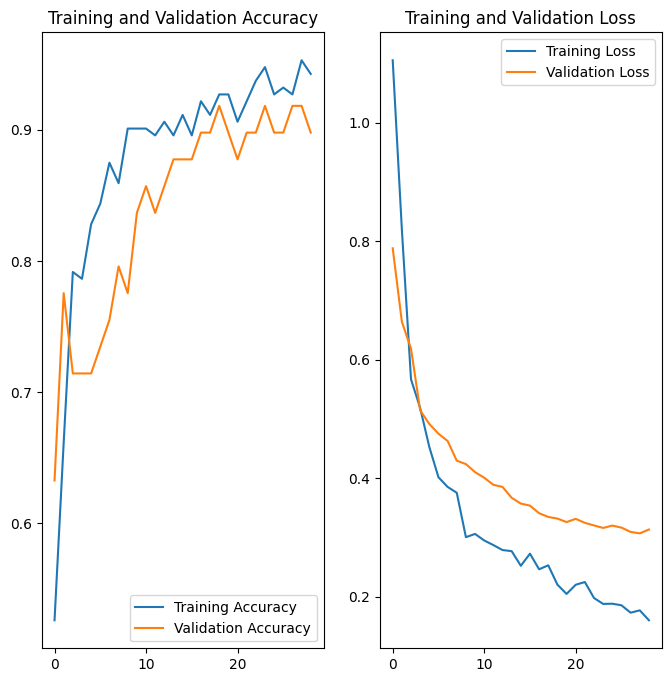

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
predictions = model.predict(val_data_gen, verbose=1)
print(predictions)
print(np.argmax(predictions))

for i in range(len(predictions)):
    print(np.argmax(predictions[i]))

2/2 [==============================] - 1s 251ms/step
[[6.7805938e-02 2.7856989e-02 9.0433705e-01]
 [9.3644761e-02 1.6037071e-02 8.9031816e-01]
 [9.9829441e-01 1.5063987e-03 1.9920040e-04]
 [1.4030783e-03 1.5814194e-03 9.9701548e-01]
 [9.6927576e-02 9.9847503e-02 8.0322492e-01]
 [2.5805684e-03 8.2127545e-03 9.8920667e-01]
 [5.3640045e-02 2.9950556e-01 6.4685434e-01]
 [9.9859172e-01 9.5739716e-04 4.5076379e-04]
 [9.9974459e-01 2.2801640e-04 2.7456004e-05]
 [9.9688584e-01 2.4780512e-03 6.3619198e-04]
 [4.3236250e-01 1.7255533e-01 3.9508218e-01]
 [6.1789644e-01 3.1323247e-03 3.7897125e-01]
 [9.9652380e-01 8.2496932e-05 3.3937248e-03]
 [9.9252582e-01 5.2150097e-03 2.2591290e-03]
 [3.8141605e-02 5.0777990e-02 9.1108042e-01]
 [6.4684427e-01 4.1496262e-02 3.1165949e-01]
 [3.0059775e-02 1.0365797e-01 8.6628228e-01]
 [6.6209916e-04 1.9846322e-02 9.7949159e-01]
 [2.5796694e-01 3.1138858e-01 4.3064448e-01]
 [4.0490087e-02 1.2315862e-01 8.3635122e-01]
 [3.3108168e-04 3.8904643e-03 9.9577844e-01]
 [

In [27]:
model.save("crop_VGGmobilenet.h5")

In [28]:
model= tf.keras.models.load_model(
       ('croprice_damage_mobileNetv5.h5'),
       custom_objects={'KerasLayer': hub.KerasLayer}
)

import urllib.request

urllib.request.urlretrieve(
  'https://images.hindustantimes.com/img/2022/09/25/550x309/fa3cc606-3ce4-11ed-8b5b-641320d18bc4_1664135135642.jpg',
   "./crop_field.png")

test = np.array(tf.keras.utils.load_img("crop_field.png", target_size=(224, 224)))/255
test = np.expand_dims(test, 0)
test.shape

(1, 224, 224, 3)

In [29]:
model.predict(test)

1/1 [==============================] - 1s 768ms/step


array([[0.0446636 , 0.01789413, 0.93744224]], dtype=float32)